<a href="https://colab.research.google.com/github/zza0818/py-11/blob/master/wk10_py_data_science_II_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python data science: pandas & graphics wokout

## Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### [1] Make data, Series, and DataFrame

### Series

In [2]:
# Creating a Series by passing a list of values #nan은 결과가 없는 데이터
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# Make dataframe using an array with random numbers
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # 6 = 행의 개수, index =위에서 만든 데이터를 인덱스로 사용 
df

,A,B,C,D
2013-01-01,0.414742,-1.122044,0.556883,1.051576
2013-01-02,-0.045800,0.969436,0.461084,1.401571
2013-01-03,0.300918,1.428585,0.076663,-0.861629
2013-01-04,0.566953,-1.795449,-1.316159,1.523861
2013-01-05,-0.505098,-0.330733,0.336963,-0.412949
2013-01-06,0.871711,-1.382222,-1.117799,1.098812


In [5]:
# check types of df  --> same type
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

In [0]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 'A' : 1., 
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

In [7]:
df2  # df1와 다르게 시간도 있고 아주 다양한 다른 성격의 데이터들을 다룰수 있는 아주 효율적인 구조이다

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
# check types of df2 --> different types
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### [2] Handling data

In [14]:
# head()
df.head() # 6개밖에 없어서 평균값이 0에 가까이 가지 못함.

,A,B,C,D
2013-01-01,0.414742,-1.122044,0.556883,1.051576
2013-01-02,-0.045800,0.969436,0.461084,1.401571
2013-01-03,0.300918,1.428585,0.076663,-0.861629
2013-01-04,0.566953,-1.795449,-1.316159,1.523861
2013-01-05,-0.505098,-0.330733,0.336963,-0.412949


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,0.566953,-1.795449,-1.316159,1.523861
2013-01-05,-0.505098,-0.330733,0.336963,-0.412949
2013-01-06,0.871711,-1.382222,-1.117799,1.098812


In [16]:
# Display the index, columns, and the underlying NumPy data:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.267238,-0.372071,-0.167061,0.633540
std,0.484274,1.315491,0.831436,1.010390
min,-0.505098,-1.795449,-1.316159,-0.861629
25%,0.040880,-1.317177,-0.819183,-0.046818
50%,0.357830,-0.726389,0.206813,1.075194
75%,0.528900,0.644394,0.430054,1.325881
max,0.871711,1.428585,0.556883,1.523861


In [19]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [20]:
# Transposing your dataframe:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.414742,-0.045800,0.300918,0.566953,-0.505098,0.871711
B,-1.122044,0.969436,1.428585,-1.795449,-0.330733,-1.382222
C,0.556883,0.461084,0.076663,-1.316159,0.336963,-1.117799
D,1.051576,1.401571,-0.861629,1.523861,-0.412949,1.098812


#### Sorting

In [21]:
# Sorting by an axis:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,0.871711,-1.382222,-1.117799,1.098812
2013-01-05,-0.505098,-0.330733,0.336963,-0.412949
2013-01-04,0.566953,-1.795449,-1.316159,1.523861
2013-01-03,0.300918,1.428585,0.076663,-0.861629
2013-01-02,-0.045800,0.969436,0.461084,1.401571
2013-01-01,0.414742,-1.122044,0.556883,1.051576


In [22]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.051576,0.556883,-1.122044,0.414742
2013-01-02,1.401571,0.461084,0.969436,-0.045800
2013-01-03,-0.861629,0.076663,1.428585,0.300918
2013-01-04,1.523861,-1.316159,-1.795449,0.566953
2013-01-05,-0.412949,0.336963,-0.330733,-0.505098
2013-01-06,1.098812,-1.117799,-1.382222,0.871711


In [23]:
# Sorting by values:
df.sort_values(by='B') #, ascending=False)

,A,B,C,D
2013-01-04,0.566953,-1.795449,-1.316159,1.523861
2013-01-06,0.871711,-1.382222,-1.117799,1.098812
2013-01-01,0.414742,-1.122044,0.556883,1.051576
2013-01-05,-0.505098,-0.330733,0.336963,-0.412949
2013-01-02,-0.045800,0.969436,0.461084,1.401571
2013-01-03,0.300918,1.428585,0.076663,-0.861629


#### Selecting data by indexing and slicing

> **at, iat, loc, iloc**     loc = location 

In [0]:
# Selecting a single column, which yields a Series
df['A']

In [0]:
# Selecting via [], which slices the rows.
df[0:3]

In [0]:
df['20130102':'20130104'] # 인덱스가 아닌 값인 경우는 지전된 범위가 다 선택된다.

#### Selecting data by label

In [0]:
df

In [0]:
df.loc[dates[0]]   # loc()

In [0]:
# Selecting on a multi-axis by label:
df.loc[:,['A','B']]

#### [도전코딩] - 도전코딩은 기말고사에 나옴!

> Select data for first two days AND comumn 3,4 from df.

In [26]:
#df.loc[1:3,['C','D']]
#df.loc['20130101':'20130102',['C','D']]
 df.loc[dates[:2],['C','D']]

,C,D
2013-01-01,0.556883,1.051576
2013-01-02,0.461084,1.401571


#### Selecting data by position  (iloc())

In [28]:
df

,A,B,C,D
2013-01-01,0.414742,-1.122044,0.556883,1.051576
2013-01-02,-0.045800,0.969436,0.461084,1.401571
2013-01-03,0.300918,1.428585,0.076663,-0.861629
2013-01-04,0.566953,-1.795449,-1.316159,1.523861
2013-01-05,-0.505098,-0.330733,0.336963,-0.412949
2013-01-06,0.871711,-1.382222,-1.117799,1.098812


In [29]:
df.iloc[3]  # 결과는 차원축소형으로 표현됨.

A    0.566953
B   -1.795449
C   -1.316159
D    1.523861
Name: 2013-01-04 00:00:00, dtype: float64

In [30]:
# [다시 도전]
# Select data for first two days AND comumn 3,4 from df.
df.iloc[:2,2:4]

,C,D
2013-01-01,0.556883,1.051576
2013-01-02,0.461084,1.401571


In [31]:
# Select one item
df.iloc[1,1]

0.9694362717947291

#### Selecting data by Boolean indexing

In [0]:
df

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.414742,-1.122044,0.556883,1.051576
2013-01-03,0.300918,1.428585,0.076663,-0.861629
2013-01-04,0.566953,-1.795449,-1.316159,1.523861
2013-01-06,0.871711,-1.382222,-1.117799,1.098812


In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,0.414742,NaN,0.556883,1.051576
2013-01-02,NaN,0.969436,0.461084,1.401571
2013-01-03,0.300918,1.428585,0.076663,NaN
2013-01-04,0.566953,NaN,NaN,1.523861
2013-01-05,NaN,NaN,0.336963,NaN
2013-01-06,0.871711,NaN,NaN,1.098812


### Setting (데이터 재구성 또는 확장)

In [0]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

In [0]:
df['F'] = s1

In [0]:
df  # 기존 df의 구조에 맞춰서 재구성됨.

In [0]:
# Setting values by label:
df.at[dates[0],'A'] = 0
df

In [0]:
# Setting values by position (index):
df.iat[0,1] = 0
df

In [0]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df))
df

### Missing data

- pandas primarily uses the value np.nan to represent missing data. 

In [0]:
# Reindexing allows you to change/add/delete the index on a specified axis.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

In [0]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

In [0]:
# To drop any rows that have missing data.
df1.dropna(how='any')

In [0]:
# Filling missing data.
df1.fillna(value=5)

In [0]:
# Get the boolean mask where values are nan.
pd.isna(df1)

### Stats

In [34]:
df

,A,B,C,D
2013-01-01,0.414742,-1.122044,0.556883,1.051576
2013-01-02,-0.045800,0.969436,0.461084,1.401571
2013-01-03,0.300918,1.428585,0.076663,-0.861629
2013-01-04,0.566953,-1.795449,-1.316159,1.523861
2013-01-05,-0.505098,-0.330733,0.336963,-0.412949
2013-01-06,0.871711,-1.382222,-1.117799,1.098812


In [35]:
df.mean()

A    0.267238
B   -0.372071
C   -0.167061
D    0.633540
dtype: float64

In [36]:
df.mean(0)

A    0.267238
B   -0.372071
C   -0.167061
D    0.633540
dtype: float64

In [37]:
df.mean(1)

2013-01-01    0.225289
2013-01-02    0.696573
2013-01-03    0.236134
2013-01-04   -0.255199
2013-01-05   -0.227955
2013-01-06   -0.132374
Freq: D, dtype: float64

***

# Chapter 12-03
## matplotlib을 사용한다

### plot( )로 그래프를 그린다

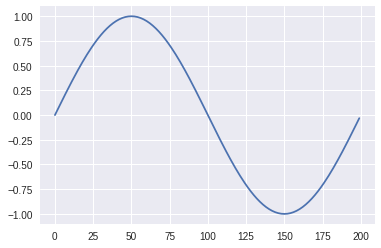

In [39]:
# sin그래프를 그린다
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01))
t = plt.plot(s)    # sin의 그래프를 그림

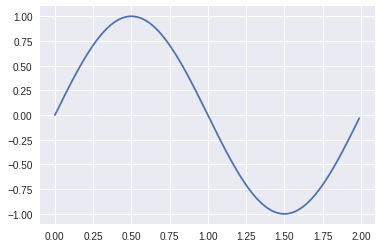

In [40]:
 plt.plot(np.arange(0.0, 2.0, 0.01),s)

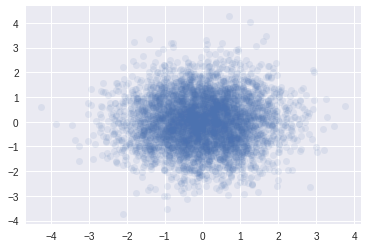

In [41]:
# 산포도(scatter plot)를 그린다
# 인수 마커를 사용하여 산포도를 작성
x = np.random.randn(5000)    # 표준 정규 분포에 따라 난수 생성
y = np.random.randn(5000)
t = plt.plot(x, y, 'o', alpha=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


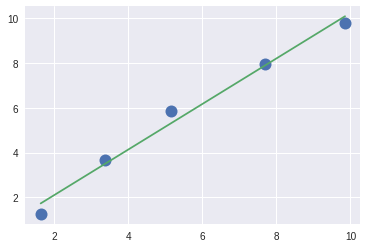

In [42]:
# 그래프를 중복해 그림
x = np.array([1.628, 3.363, 5.145, 7.683, 9.855])
y = np.array([1.257, 3.672, 5.841, 7.951, 9.775])
# 최소 자승법(least square method)으로 데이터를 근사하는 직선을 구함
a = np.array([x, np.ones(x.size)])
a = a.T
m, c = np.linalg.lstsq(a, y)[0]
t = plt.plot(x, y, 'o', ms=12)   # 데이터를 그림
t = plt.plot(x, (m*x+c))  # 근사직선을 그림, m:기울기,c:bias(절편)

### plot( )로 그림을 제어

In [0]:
# 선 스타일 변경
s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01))
t = plt.plot(s, linestyle='--', linewidth=4)

### 문자를 삽입한다

In [0]:
# 표시용 폰트 지정
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'AppleGothic'

In [0]:
# 시스템에서 사용 가능한 글꼴 목록을 표시
import matplotlib.font_manager as fm
fontsfamily = fm.findSystemFonts()

In [0]:
fontsfamily[:5]

***

# Chapter 12-04
## 일본 인구를 시각화한다

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving female_1944_2014.csv to female_1944_2014.csv
Saving male_1944_2014.csv to male_1944_2014.csv
Saving total_fertility_rate.csv to total_fertility_rate.csv
User uploaded file "female_1944_2014.csv" with length 7323 bytes
User uploaded file "male_1944_2014.csv" with length 7218 bytes
User uploaded file "total_fertility_rate.csv" with length 550 bytes


### 인구 데이터를 읽어 들임

In [0]:
# 1944년부터 2014년까지의 5계층 단계별로 인구를 남녀별로 읽어 들임
import numpy as np

p_male = np.loadtxt('male_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))
p_female = np.loadtxt('female_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))

In [4]:
# 계급별과 연도별로 인구를 계산한다.
# 남녀 5세씩의 단계별로 인구를 합계
p_total = p_male+p_female
print(p_total)
# 연도별 인구로 수정
p_yearly = p_total.sum(axis=1)
p_yearly

[[8712. 8803. 8684. ...    0.    0.    0.]
 [9251. 8581. 8645. ...    0.    0.    0.]
 [7858. 8734. 8692. ...    0.    0.    0.]
 ...
 [5272. 5407. 5868. ... 1146.  331.   51.]
 [5239. 5361. 5790. ... 1215.  343.   55.]
 [5213. 5307. 5713. ... 1305.  352.   60.]]


array([ 73063.,  71999.,  73115.,  78101.,  80003.,  81771.,  83199.,
        84571.,  85854.,  87034.,  88294.,  89277.,  90258.,  91086.,
        92010.,  92971.,  93420.,  94285.,  95179.,  96157.,  97187.,
        98275.,  99054., 100244., 101410., 102649., 103719., 105013.,
       107334., 108709., 110050., 111940., 113086., 114153., 115174.,
       116131., 117061., 117879., 118693., 119485., 120237., 121046.,
       121672., 122264., 122784., 123254., 123611., 124044., 124452.,
       124765., 125033., 125568., 125865., 126169., 126485., 126685.,
       126923., 127289., 127433., 127618., 127687., 127766., 127769.,
       127767., 127690., 127509., 128057., 127799., 127513., 127295.,
       127082.])

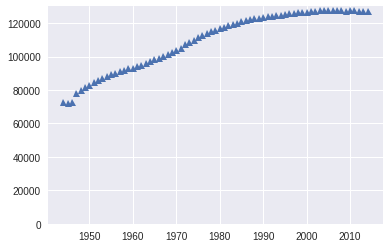

In [5]:
# 연도별 인구를 그래프화 한다
%matplotlib inline
import matplotlib.pyplot as plt

t = plt.plot(range(1944, 2015), p_yearly, '^')
plt.ylim((0, 130000))
plt.grid(True)

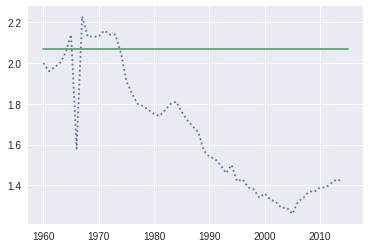

In [6]:
# 출생률(합계 특수 출생률) 그래프를 그린다
# 1960년에서 2014년을 읽어 들임
tfr = np.loadtxt('total_fertility_rate.csv', delimiter=",", skiprows=1)
# 출산율 그래프를 그린다
t = plt.plot(range(1960, 2015), tfr, ls=":")
# 인구 치환 경계선을 2.07로 하여 선을 그림
t = plt.plot([1960, 2015], [2.07, 2.07])

### 인구 피라미드를 그린다

In [0]:

# show_pgraph( ) 함수의 정의
from matplotlib import gridspec

def show_pgraph(year, arr1, arr2, arr3,
                ymin, ymax, ydim=1):
#     fig = plt.figure(figsize=(10,9))
    # 인구 피라미드를 표시
    # 표시하는 인구의 인덱스를 가져옴 (1년 간격)
    idx = int((year-ymin)/ydim)
    # 인구 피라미드와 인구 그래프의 그리드를 생성
    gs = gridspec.GridSpec(2, 2, height_ratios=(3, 2))
    # 그래프의 배치를 결정
    ax = [plt.subplot(gs[0, 0]),plt.subplot(gs[0, 1]),
          plt.subplot(gs[1, :])]
    # 남성 인구 피라미드를 그림
    ax[0].barh(range(0, 101, 5), arr1[idx], height=3)
    ax[0].set(ylim=(0, 100), xlim=(0, 6000))
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_right()
    # 여성 인구 피라미드를 그림
    ax[1].barh(range(0, 101, 5), arr2[idx], height=4)
    ax[1].tick_params(labelleft='off')
    ax[1].set(ylim=(0, 100), xlim=(0, 6000))
    # 인구 그래프를 그림
    ax[2].plot(range(ymin, ymax+1, ydim), arr3, ls=":")
    ax[2].plot([year, year], [0, 140000])

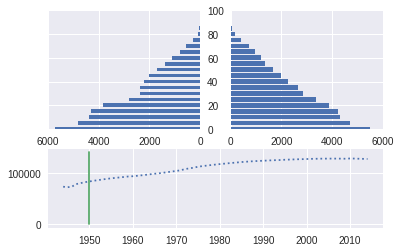

In [23]:
# 인구 피라미드의 그래프를 그린다
show_pgraph(1950, p_male, p_female, p_yearly,
            1944, 2014)

> year를 변경해서 그래프를 그려보시오.

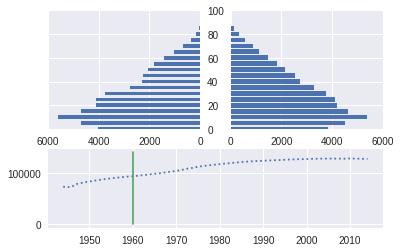

In [24]:
show_pgraph(1960,p_male,p_female, p_yearly,
           1944,2014)

In [0]:
# show_pgraph( ) 함수의 정의
from matplotlib import gridspec

def show_pgraph(year, arr1, arr2, arr3,
                ymin, ymax, ydim=1):
#     fig = plt.figure(figsize=(10,9))
    # 인구 피라미드를 표시
    # 표시하는 인구의 인덱스를 가져옴 (1년 간격)
    idx = int((year-ymin)/ydim)
    # 인구 피라미드와 인구 그래프의 그리드를 생성
    gs = gridspec.GridSpec(2, 2, height_ratios=(3, 2))
    # 그래프의 배치를 결정
    ax = [plt.subplot(gs[0, 0]),plt.subplot(gs[0, 1]),
          plt.subplot(gs[1, :])]
    # 남성 인구 피라미드를 그림
    ax[0].barh(range(0, 101, 5), arr1[idx], height=3)
    ax[0].set(ylim=(0, 100), xlim=(0, 6000))
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_right()
    # 여성 인구 피라미드를 그림
    ax[1].barh(range(0, 101, 5), arr2[idx], height=4)
    ax[1].tick_params(labelleft='off')
    ax[1].set(ylim=(0, 100), xlim=(0, 6000))
    # 인구 그래프를 그림
    ax[2].plot(range(ymin, ymax+1, ydim), arr3, ls=":")
    ax[2].plot([year, year], [0, 130000])

ValueError: ignored

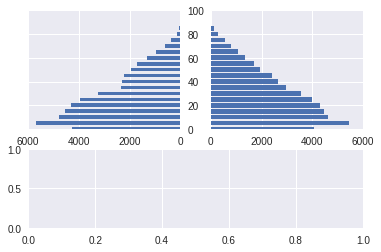

In [18]:
# 인구 피라미드의 그래프를 그린다
show_pgraph(2013, p_male, p_female, p_yearly,
            2000, 2020)

***

## 특강안내

### VR 응용과 전망 (HC 관련 내용 포함)

### 11월8일(목) 4시~6시, 신어관 101호 강당

***

### [wk10] homework

#### 다음 파이썬 노트북 [tips_reshape](https://github.com/Redwoods/Py/blob/master/py-basic/tips/Tips_py_reshape.ipynb) 을 colab에서 실행하고 설명을 추가해서 github에 올리시오.(마감: 2018.11.11(일). 24:00)

> 제출 파일명: Summary_reshape.ipynb

***